<center>
    <h1> INF393 - Máquinas de Aprendizaje  </h1>
    <h2> Tarea 2 </h2>
    <h3> Universidad Técnica Federico Santa Maria </h3>
    
</center>

_Noviembre 2017_
<p>Profesor: R. Ñanculef</p>
 <p>Ayudante: Francisco Mena</p>
 <p>Integrantes: 
 <br>Alfredo Silva,
 201373511-8</br>
 <br>Fernando Llorens, 201373528-2</br>
 

 
</p>

<h1>1. Tipos de fronteras en Clasificación</h1>
<p>Como se ha discutido en clases, los problemas de clasificación pueden ser representados de distintas
maneras, en donde estas representaciones definen un espacio de entrada del dominio de los datos (RX). Los
ejemplos dentro del espacio de entrada (manifold) pueden tener distintas formas, donde estas indicarán si es
que estos ejemplos tendrán fronteras lineales o no. Con el propósito de analizar los distintos tipos de fronteras
que definen los algoritmos de clasificación, se trabajará con un dataset sintético lo cual es ideal para analizar
los diferentes tipos.</p>

<p>Este dataset está en un espacio de 2 dimensiones y es conformado por dos conjuntos de datos, pudiendo
ver que la frontera entre ellos claramente no es lineal. Uno de los conjuntos de datos es ovalado, generado
a través de una distribución multivariada gaussiana, el otro conjunto de datos es una semi-luna, generado a
través de funciones senos y cosenos. Se agrega ruido en los conjuntos para que no sea un problema trivial. El
código que los genera es el siguiente:
</p>


In [19]:
import numpy as np
n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

<p>(a) Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un
shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color
naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con
el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada
conjunto y visualícelos</p>

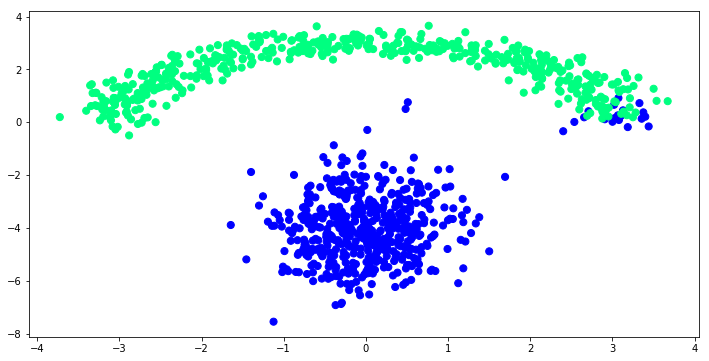

520
480


In [20]:
import numpy as np
import matplotlib.pyplot as plt
X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)
fig = plt.figure(figsize=(12,6))
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.winter)
plt.show()
print(len(y1))
print(len(y2))



<p>Para visualizar las fronteras de los distintos algoritmos clasificadores utilice el siguiente código:</p>

In [22]:
import matplotlib.pyplot as plt
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

<p>(b) Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.
</p>

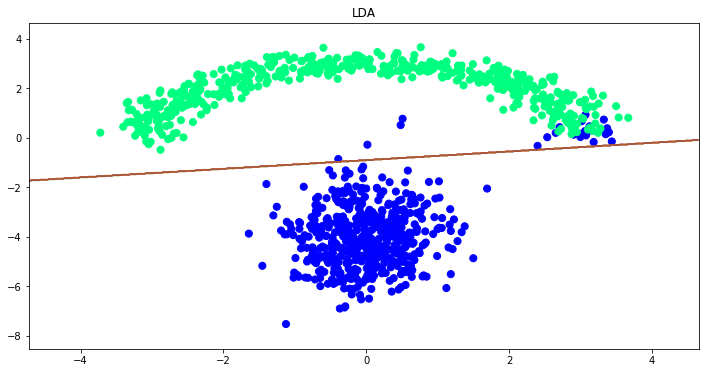

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model = LDA()
model.fit(X,y)
visualize_border(model,X,y,"LDA")

<p>(c) Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y
en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?
</p>

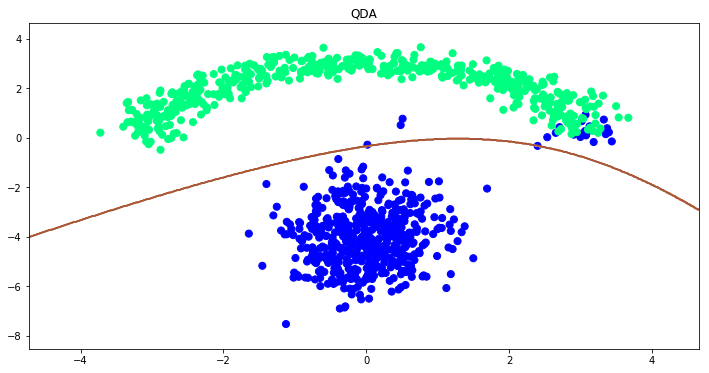

In [25]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model = QDA()
model.fit(X,y)
visualize_border(model,X,y, "QDA")

<p>(d) Compare cuantitativamente los clasificadores LDA Y QDA en este dataset sintético mediante la métrica
de error de clasificación.</p>

In [26]:
from sklearn.metrics import accuracy_score
model = LDA()
model.fit(X,y)
y_true=y
y_pred= model.predict(X)
print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred)))
model = QDA()
model.fit(X,y)
y_true=y
y_pred= model.predict(X)
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred)))

Miss Classification Loss LDA: 0.024000
Miss Classification Loss QDA: 0.023000


<p>Para lo que sigue de la actividad se trabajará con una widget interactiva para sintonizar los parámetros
de regularización de los distintos algoritmos. Por ello cada vez que se modifique el parámetro en la ventana
se entrenará el modelo y se visualizará la frontera en la misma imagen.
</p>

In [27]:
from ipywidgets import interactive
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

<p>(e) Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma l2), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.</p>

In [28]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model
p_min = pow(10,-7)
p_max = pow(10,2)
interactive(visualize_border_interactive,param=(p_min,p_max))

A Jupyter Widget

<p>(f) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.</p>

In [29]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model
p_min = pow(10,-7)
p_max = pow(10,3)
interactive(visualize_border_interactive,param=(p_min,p_max))
#use interactive

A Jupyter Widget

<p>(g) Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.</p>

In [30]:
#edit the train_model function
from sklearn import svm

def visualize_border_interactive_new(param):
    model = train_model_no_lineal(param)
    visualize_border(model,X,y)

def train_model_no_lineal(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y)
    return model
p_min = pow(10,-3)
p_max = pow(10,2)
interactive(visualize_border_interactive_new,param=(p_min,p_max))

A Jupyter Widget

<p>(h) Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar
el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profunidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.</p>

In [31]:
from sklearn.tree import DecisionTreeClassifier as Tree
def visualize_border_interactive_tree(param):
    model = train_model_tree(param)
    visualize_border(model,X,y)

def train_model_tree(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model
p_min = 1
p_max = 7 #con 6>= cambia a una nueva ramificacion
interactive(visualize_border_interactive_tree,param=(p_min,p_max))

A Jupyter Widget

<p>(i) Construya un algoritmo k-NN para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro k. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.</p>

In [32]:
from sklearn.neighbors import KNeighborsClassifier

def visualize_border_interactive_KN(param):
    model = train_model_KN(param)
    visualize_border(model,X,y)

def train_model_KN(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)    
    model.fit(X,y)
    return model
p_min = 1
p_max = 100
interactive(visualize_border_interactive_KN,param=(p_min,p_max))

A Jupyter Widget

<h1>2. Análisis de audios como datos brutos</h1>
<p>Distintos tipos de datos han sido tratados en el área de Machine Learning, donde el análisis de estos y
el manejo para poder dejarlos en una representación que se pueda entregar como entrada al algoritmo es
crucial. El manejo sobre los datos brutos se denomina pre-procesamiento y existen distintos dependiento del
tipo de datos y los distintos diminios de problemas, tales como imágenes, audios, texto.
En esta actividad se trabajará con datos de audios los cuales son directamente extraídos desde datos fuentes
.wav, lo que corresponde a una señal de sonido en diferentes tiempos.
</p>
<p>El dataset se denomina Heartbeat Sounds y es presentado en la plataforma Kaggle a través del siguiente
link. Este dataset consta de grabaciones de sonidos de latidos cardíacos normales y anormales, con distintas
categorías para los latidos anormales.
Para la tarea se trabajará con el dataset A presente en la data, el cual corresponde a datos generados desde
la vía pública mediante la aplicación de Iphone iStethoscope Pro. El objetivo será el de clasificar cada sonido
como latido cardíaco normal o una de las las subcategorías de anormal (Murmur, Extra Heart Sound, Artifact),
por lo que se trata de un problema de clasificación múltiple con 4 clases. Las distintas clasificaciones
para los sonidos son explicadas en el sitio de Kaggle.
</p>
<p>Para leer y trabajar los archivos de extensión .wav se utilizará el siguiente código:
</p>

In [1]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

<p>(a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase</p>

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
df.shape
df.info()
df.describe()
clases=set(df['label'].values)
print(clases)
print(len(clases))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB
set([nan, 'extrahls', 'murmur', 'artifact', 'normal'])
5


In [3]:
df.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


<p>
El dataset tiene 176 elementos, con 4 variables, pero una de ella no sirve para nada (sublavel) ya que todos sus valores son NaN (Not a Number, básicamente no tiene valor). Además 52 elementos no tienen sus label puestas, el resto está clasificado en las otras 4 clases: murmur, normal, extrahls y artifact.
</p>

<p>(b) Lea los archivos .wav y transformelos en secuencias de tiempo. Realice un padding de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.</p>

In [3]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df = pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))


<p>
Se necesita hacer el padding de 0, porque todas las entradas a una máquina de aprendizaje en cuestión deben tener la misma cantidad de dimensiones, es decir si una maquina acepta vectores de tamaño $d$, entonces cualquier entrada ya sea de entrenamiento o de test deben cumplir con tener dimensión $d$.
</p>
<p>
Una alternativa a realizar padding para completar la dimensión $d$, es repetir la secuencia al final.
</p>

<p>(c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto,
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?</p>


In [4]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

clases=set(new_df['target'].values)
print(clases)
print(len(clases))
print(" ")

import collections
counter=collections.Counter(new_df['target'].values)
print("Frecuencia de datos en las clases:")
for i in range(len(counter.values())):
    print("{} = {}".format(counter.keys()[i],
                             counter.values()[i]))

set(['normal/extrahls', 'murmur', 'artifact'])
3
 
Frecuencia de datos en las clases:
normal/extrahls = 65
murmur = 53
artifact = 58


<p>
Habian 5 clases, ahora hay 3. Se categorizaron las datos registrados como NaN y se fusionó la clase normal con extrahls para formar solo una.
</p>
<p>
Si los datos estan mal etiquetados desde un inicio, entiendase por esto que existen datos que en realidad corresponden a una clase, pero se encuentran catalogados como otra distinta a esta, las máquinas no podrán aprender como clasificar datos futuros de manera correcta, ya que desde el vamos aprendieron reglas incorrectas, podría provocar dos cosas en general, primero que dos o más clases no puedan ser distinguidas a futuro o bien que si haga distinciones entre ellas, pero de manera erronea. A priori y sin asumir nada no se podría decir si solo un dato mal etiquetado pueda causar estragos notables en la máquina, pero dependerá mucho del tipo de máquina que se esté entrando, de cuantos datos de entrenamiento se tengan y además de cuantos ejemplos por clase se tengan. Por último si una máquina cambia mucho su manera de clasificar cuando solo un dato está mal etiquetado, entonces se puede decir que es una máquina frágil y poco confiable, ya que no esta aprendiendo a generalizar las caracterísiticas de la clase en sí misma.
</p>

<p>(d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.</p>

In [5]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

clases=set(new_df['target'].values)
print(clases)

set([0, 1, 2])


<p>(e) Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?</p>

In [6]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176L, 396900L)

<p>
La primera dimensión es de 176, bastante razonable, pero la segunda es de 393900, bastante más dimensiones de las que generalmente se habían trabajado en el curso hasta ahora. El hecho de que sean ordenes de magnitud más variables que datos no permite realizar máquina alguna (de entre las vistas en el curso al menos) que logre generalizar. 
</p>

<p>(f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.
</p>

In [7]:
X_fourier = np.abs(np.fft.fft(X))

<p>
Este es un paso standar que se realiza cuando se trabaja con audio como input. 
</p>

<p>(g) Para seguir con el pre-procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?</p>


In [8]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176L, 100000L)

<p>
Claramente la cantidad de features se redujo considerablemente, al rededor de a un cuarto de la cantidad original, de esta manera se podría sobrellevar mejor el problema de overfitting desde antes de entrenar, aunque de momento siguen siendo muchas veces más variables que datos.
</p>
<p>
La muestra debería seguir siendo representativa, puesto que la varible temporal utilizada es muy densa y lo que se está realizando en el código anterior es básicamente reducir esta densidad tomando 1 dato cada 3. En otras palabras, lo que se hace es reducir la calidad del sonido, sin que se llegue a perder el mismo.
</p>

<p>(h) Genere un conjunto de pruebas mediante la técnica hold-out validation para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?</p>

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
clases= set(y_train)
print(clases)
print("Son "+str(len(clases))+" clases en total.")

import collections
counter=collections.Counter(y_train)
print("Frecuencia de datos en las clases:(Entrenamiento)")
for i in range(len(counter.values())):
    print("{} = {}".format(counter.keys()[i],
                             counter.values()[i]))
counter=collections.Counter(y_test)
print("Frecuencia de datos en las clases:(Prueba)")
for i in range(len(counter.values())):
    print("{} = {}".format(counter.keys()[i],
                             counter.values()[i]))

(132L, 100000L)
(132L,)
set([0, 1, 2])
Son 3 clases en total.
Frecuencia de datos en las clases:(Entrenamiento)
0 = 48
1 = 40
2 = 44
Frecuencia de datos en las clases:(Prueba)
0 = 10
1 = 13
2 = 21


<p>(i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.</p>

In [10]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

print(X_train[:10])

[[-0.37737569 -0.18692772 -0.59367709 ..., -0.15189885 -0.59367709
  -0.18692772]
 [-0.37530838 -0.35122933 -0.54639495 ..., -0.32832746 -0.54639495
  -0.35122933]
 [-0.69520971 -0.59947584 -0.82213478 ..., -0.71478577 -0.82213478
  -0.59947584]
 ..., 
 [-0.55255253 -0.43353554 -0.60758765 ..., -0.57625178 -0.60758765
  -0.43353554]
 [ 1.30332045 -0.16440559  2.61549841 ..., -1.24105353  2.61549841
  -0.16440559]
 [ 1.68802093  2.40877588  2.55374423 ...,  2.46926893  2.55374423
   2.40877588]]


<p>
Este paso es muy importante, ya que PCA (algoritmo reductor que se utilizará más adelante) supone que los datos están centrados en cero, de lo contrario PCA no podría ser aplicado al dataset.
</p>

<p>(j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.</p>

(132L, 2L)


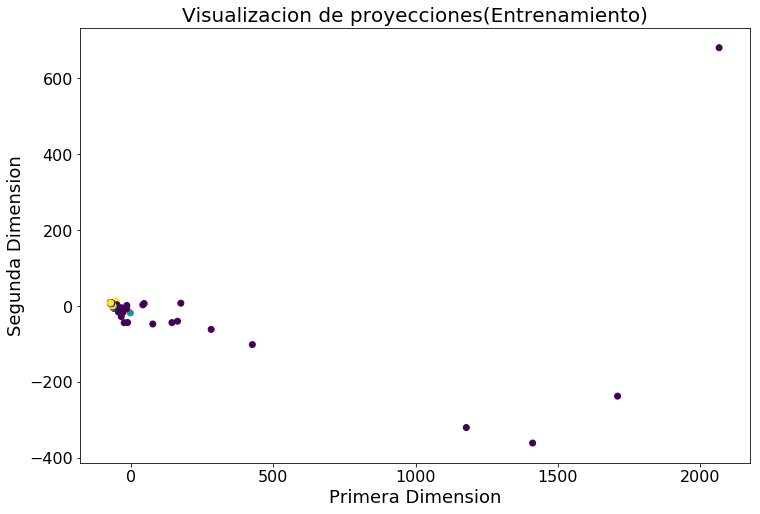

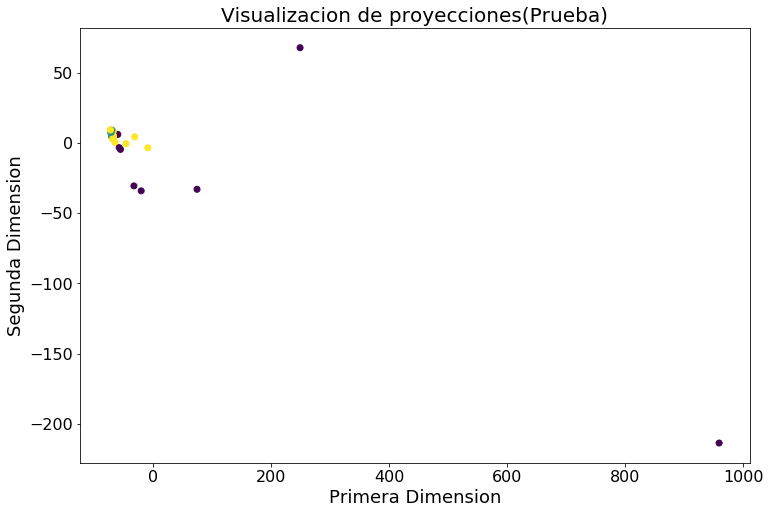

In [11]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

print(X_pca_train.shape)

import matplotlib.pylab as plt
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(X_pca_train[:,0],X_pca_train[:,1],c=y_train)
plt.title("Visualizacion de proyecciones(Entrenamiento)", size=20)
plt.xlabel("Primera Dimension", size=18)
plt.ylabel("Segunda Dimension", size=18)
plt.tick_params(labelsize=16)
plt.show()

plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(X_pca_test[:,0],X_pca_test[:,1],c=y_test)
plt.title("Visualizacion de proyecciones(Prueba)", size=20)
plt.xlabel("Primera Dimension", size=18)
plt.ylabel("Segunda Dimension", size=18)
plt.tick_params(labelsize=16)
plt.show()

<p>
Se puede ver que tanto en el conjunto de entrenamiento, como en el conjunto de prueba dos de las clases se concentran al rededor del 0, mientras que la tercera clase (artifact) se dispersa demaciado por toda la gráfica.
</p>

<p>(k) Entrene un modelo de Regresión Logística variando el parámetro de regularizacion C construyendo un
gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion C en el mismo rango
que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.
</p>

Score de LR C=0.0001: 0.568181818182
Score de LR C=0.01: 0.568181818182
Score de LR C=0.1: 0.545454545455
Score de LR C=1: 0.545454545455
Score de LR C=10: 0.522727272727
Score de LR C=100: 0.545454545455
Score de LR C=1000: 0.545454545455


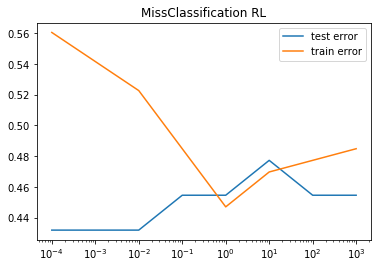

Score de SVM C=0.0001: 0.545454545455
Score de SVM C=0.01: 0.568181818182
Score de SVM C=0.1: 0.545454545455
Score de SVM C=1: 0.545454545455
Score de SVM C=10: 0.545454545455
Score de SVM C=100: 0.545454545455
Score de SVM C=1000: 0.590909090909


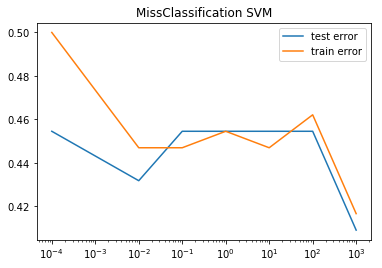

In [21]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]
errRL=[]
errRL2=[]
from sklearn.linear_model import LogisticRegression
for i in Cs:
    model = LogisticRegression(C=i)
    model.fit(X_pca_train,y_train)

    predTestLR = model.predict(X_pca_test)
    predTrainLR = model.predict(X_pca_train)

    from sklearn.metrics import accuracy_score
    errorTestLR = accuracy_score(predTestLR,y_test)
    print("Score de LR C="+str(i)+": "+str(errorTestLR))
    errRL.append(1- errorTestLR)
    errRL2.append(1- accuracy_score(predTrainLR,y_train))
# log
import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('MissClassification RL')
ax.plot(Cs,errRL,label='test error')
ax.plot(Cs,errRL2,label='train error')
plt.legend(loc=1)
plt.xscale('log')
ax.set_xlim(ax.get_xlim()[::1])
plt.show() 


errSVM=[]
errSVM2=[]
from sklearn.svm import SVC
for i in Cs:
    clf = SVC(C=i, kernel='linear')
    clf.fit(X_pca_train, y_train)
    
    predTestSVR = clf.predict(X_pca_test)
    predTrainSVM = clf.predict(X_pca_train)
    
    errorTestSVR = accuracy_score(predTestSVR,y_test)
    print("Score de SVM C="+str(i)+": "+str(errorTestSVR))
    errSVM2.append(1- accuracy_score(predTrainSVM,y_train))
    errSVM.append(1-errorTestSVR)

ax = plt.gca()
plt.title('MissClassification SVM')
ax.plot(Cs,errSVM,label='test error')
ax.plot(Cs,errSVM2,label='train error')
plt.legend(loc=1)
plt.xscale('log')
ax.set_xlim(ax.get_xlim()[::1])
plt.show()    
    
  

<p>
El C que mejora más el Accuracy Score (~57%)  de la RL (o disminuye más el Error de MissClassification) es $C=0.1$ o menor, después de eso empieza a presentar overfitting.
</p>
<p>
Para la SVM el mejor valor para el parametro C es $C=1000$, entregando un accuracy de ~60%.
</p>
<p>
De esta manera ambos presentan un comportamiento similar cuando se sintoniza bien el parámetro C.
</p>

<p>(l) Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro
regularizador max depth, construyendo un gráfico resumen del error en función de este parámetro.
Compare con los modelos anteriores.</p>

Score de DTC(Depth =1): 0.477272727273
Score de DTC(Depth =2): 0.522727272727
Score de DTC(Depth =3): 0.613636363636
Score de DTC(Depth =4): 0.590909090909
Score de DTC(Depth =5): 0.613636363636
Score de DTC(Depth =6): 0.613636363636
Score de DTC(Depth =7): 0.590909090909
Score de DTC(Depth =8): 0.613636363636
Score de DTC(Depth =9): 0.522727272727
Score de DTC(Depth =10): 0.545454545455
Score de DTC(Depth =11): 0.545454545455
Score de DTC(Depth =12): 0.522727272727
Score de DTC(Depth =13): 0.522727272727
Score de DTC(Depth =14): 0.522727272727
Score de DTC(Depth =15): 0.522727272727
Score de DTC(Depth =16): 0.545454545455
Score de DTC(Depth =17): 0.5
Score de DTC(Depth =18): 0.5
Score de DTC(Depth =19): 0.5
Score de DTC(Depth =20): 0.522727272727
Score de DTC(Depth =21): 0.5
Score de DTC(Depth =22): 0.545454545455
Score de DTC(Depth =23): 0.522727272727
Score de DTC(Depth =24): 0.545454545455
Score de DTC(Depth =25): 0.522727272727
Score de DTC(Depth =26): 0.5
Score de DTC(Depth =27):

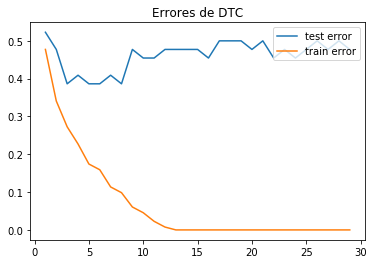

In [23]:
Depths = range(1,30)
errA=[]
errA2=[]
from sklearn.tree import DecisionTreeClassifier as DTC
for d in Depths:
    arbol = DTC(max_depth=d)
    arbol.fit(X_pca_train, y_train)
    
    predTestDTC = arbol.predict(X_pca_test)
    predTrainDTC = arbol.predict(X_pca_train)
    from sklearn.metrics import accuracy_score
    errorTestDTC = accuracy_score(predTestDTC,y_test)
    print("Score de DTC(Depth ="+str(d)+"): "+str(errorTestDTC))
    errA.append(1-errorTestDTC)
    errA2.append(1- accuracy_score(predTrainDTC,y_train))

import matplotlib.pyplot as plt

ax = plt.gca()
plt.title('Errores de DTC')
ax.plot(Depths,errA,label='test error')
ax.plot(Depths,errA2,label='train error')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show()  


<p>
Cuando se utiliza una profundidad máxima de 8 en el árbol se obtiene el mayor Accuracy Score (~61%),también puede verse como el menor MissClassification Error. De esta manera el mejor árbol solo de comporta ligeramente mejor que la mejor de las RL y la mejor de las SVM.
</p>

<p>(m) Experimente con diferentes dimensiones d para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.</p>

Score de LR Dim=2: 0.545454545455
Score de LR Dim=3: 0.568181818182
Score de LR Dim=4: 0.568181818182
Score de LR Dim=5: 0.613636363636
Score de LR Dim=6: 0.636363636364
Score de LR Dim=7: 0.727272727273
Score de LR Dim=8: 0.659090909091
Score de LR Dim=9: 0.659090909091
Score de LR Dim=10: 0.772727272727
Score de LR Dim=11: 0.772727272727
Score de LR Dim=12: 0.772727272727
Score de LR Dim=13: 0.75
Score de LR Dim=14: 0.772727272727
Score de LR Dim=15: 0.772727272727
Score de LR Dim=16: 0.772727272727
Score de LR Dim=17: 0.772727272727
Score de LR Dim=18: 0.818181818182


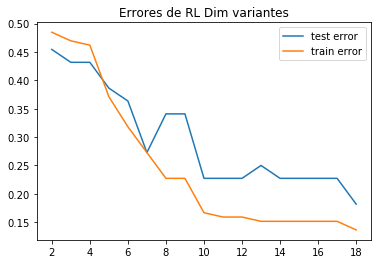

Score de SVM Dim=2: 0.545454545455
Score de SVM Dim=3: 0.522727272727
Score de SVM Dim=4: 0.545454545455
Score de SVM Dim=5: 0.704545454545
Score de SVM Dim=6: 0.681818181818
Score de SVM Dim=7: 0.704545454545
Score de SVM Dim=8: 0.704545454545
Score de SVM Dim=9: 0.704545454545
Score de SVM Dim=10: 0.75
Score de SVM Dim=11: 0.727272727273
Score de SVM Dim=12: 0.727272727273
Score de SVM Dim=13: 0.727272727273
Score de SVM Dim=14: 0.727272727273
Score de SVM Dim=15: 0.727272727273
Score de SVM Dim=16: 0.795454545455
Score de SVM Dim=17: 0.772727272727
Score de SVM Dim=18: 0.727272727273


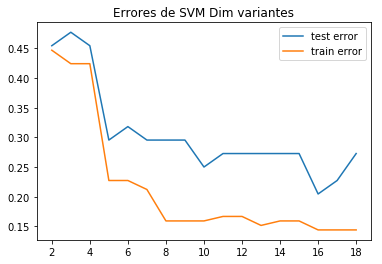

In [12]:
D = range(2,19)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
errRL = []
errRL2=[]
from sklearn.decomposition import PCA
for d in D:
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train_n = pca_model.transform(X_train)
    X_pca_test_n = pca_model.transform(X_test)

    model = LogisticRegression(C=0.1)
    model.fit(X_pca_train_n,y_train)
    predTestLR = model.predict(X_pca_test_n)
    predTrainLR=model.predict(X_pca_train_n)

    from sklearn.metrics import accuracy_score
    errorTestLR = accuracy_score(predTestLR,y_test)
    print("Score de LR Dim="+str(d)+": "+str(errorTestLR))
    errRL.append(1-errorTestLR)
    errRL2.append(1 - accuracy_score(predTrainLR,y_train))

import matplotlib.pyplot as plt

ax = plt.gca()
plt.title('Errores de RL Dim variantes')
ax.plot(D,errRL,label='test error')
ax.plot(D,errRL2,label='train error')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show() 

errSVM = []
errSVM2=[]
from sklearn.decomposition import PCA
for d in D:
    pca_model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train_n = pca_model.transform(X_train)
    X_pca_test_n = pca_model.transform(X_test)
    
    clf = SVC(C=0.1, kernel='linear')
    clf.fit(X_pca_train_n, y_train)
    
    predTestSVR = clf.predict(X_pca_test_n)
    predTrainSVM = clf.predict(X_pca_train_n)
    errorTestSVR = accuracy_score(predTestSVR,y_test)
    print("Score de SVM Dim="+str(d)+": "+str(errorTestSVR))
    errSVM.append(1-errorTestSVR)
    errSVM2.append(1-accuracy_score(predTrainSVM,y_train))


ax = plt.gca()
plt.title('Errores de SVM Dim variantes')
ax.plot(D,errSVM,label='test error')
ax.plot(D,errSVM2,label='train error')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show() 

<p>Para hacer además comparaciones entre máquinas se entrenó un RL y una SVM, en ambos casos al ir aumentado la dimensionalidad el error de training fue disminuyendo, no así con el error de test que presentó subidas y bajadas intermedias, pero los mejores valores fueron 17 dimensiones para la SVM y 18 dimensiones para la RL, ambas circundaron un mejor Accuracy Score del ~80%, pero en general la RL se comportó mucho mejor. Obviamente estos comportamientos presentaron mejores resultados que cuando se entrenaron utilizando solo 2 dimensiones. Esto nos indica que auemntando las dimensiones a alrededor de 17-18 se tiene más información útil que utilizando solo 2.</p>

<p>(n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el por qué. Visualice apropiadamente la proyección en 2 dimensiones.
</p>

C:\Users\Alfredo\Anaconda2\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


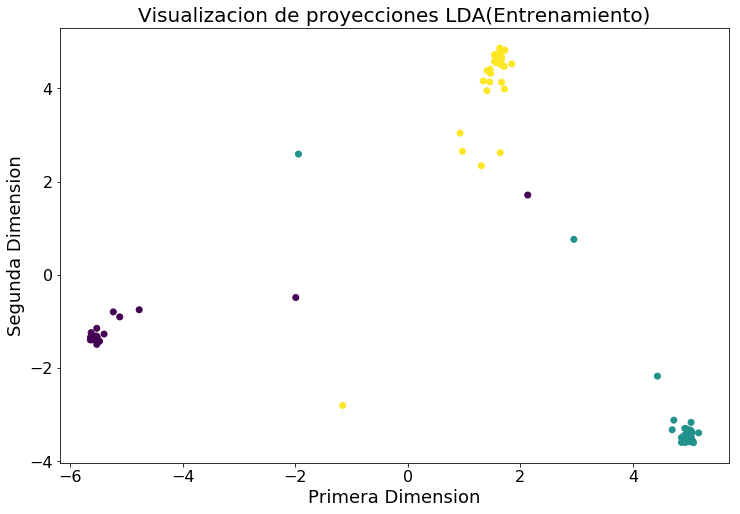

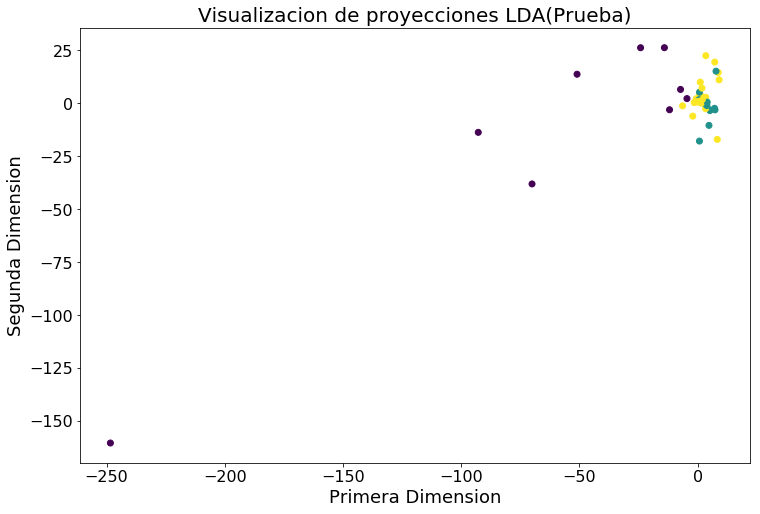

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)
#variables son colineares <- explicar eso
#posiblemente algunas variables pueden ser representadas como combinaciones lineares de otras
import matplotlib.pylab as plt
plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(X_pca_train[:,0],X_pca_train[:,1],c=y_train)
plt.title("Visualizacion de proyecciones LDA(Entrenamiento)", size=20)
plt.xlabel("Primera Dimension", size=18)
plt.ylabel("Segunda Dimension", size=18)
plt.tick_params(labelsize=16)
plt.show()

plt.figure(figsize=(12,8),facecolor='1.0') 
plt.scatter(X_pca_test[:,0],X_pca_test[:,1],c=y_test)
plt.title("Visualizacion de proyecciones LDA(Prueba)", size=20)
plt.xlabel("Primera Dimension", size=18)
plt.ylabel("Segunda Dimension", size=18)
plt.tick_params(labelsize=16)
plt.show()

<p>
La matriz está muy mal condicionada, probablemente muchas variables sean combinaciones lineales de otras, rompiendo con la primera regla para aplicar LDA, que las variables sean independientes. Esto conlleva a que si se cambia solo un dato en el conjunto la proyección va a cambiar muy fuertemente (no es soft), y se puede ver que en el conjunto de pruebas la tendencia bonita ista en el conjunto de entrenamiento no se sigue.
</p>

<p>(o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación
¿mejora o empeora el desempeño? Explique.
</p>

In [15]:
#Codigo
model = LogisticRegression(C=0.1)
model.fit(X_pca_train,y_train)
predTestLR = model.predict(X_pca_test)
from sklearn.metrics import accuracy_score
errorTestLR = accuracy_score(predTestLR,y_test)
print("Score de LR con LDA, C=0.01: "+str(errorTestLR))
print("Score de LR con PCA, C=0.01: 0.568181818182")

Score de LR con LDA, C=0.01: 0.681818181818
Score de LR con PCA, C=0.01: 0.568181818182


<p>
Se entrenó una RL sobre LDA con los mismos parámetros que la mejor RL que se hizo sobre PCA con dos dimensiones. Incluso aunque no se esperaba que LDA se comportó mejor, esto debe ser por la división tan buena que se generó en el conjunto de entrenamiento y seguramente si se hubiera mantenido esta tendencia en el conjunto de pruebas hubiera obtenido mucho mejor puntaje. 
</p>

<p>(p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias características
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos si desea.
</p>

In [18]:
#Codigo
import pandas as pd
import numpy as np
df_n = pd.DataFrame(columns = ['min', 'max', 'median'])
cosa = np.zeros((len(X_resampled), 3))


for i in range(len(X_resampled)):
    cosa[i, 1] = max(X_resampled[i,:])
    cosa[i, 2] = np.median(X_resampled[i,:])
    cosa[i, 0] = min(X_resampled[i,:])
    
X_train, X_test, y_train, y_test = train_test_split(cosa, y, test_size=0.25, random_state=42)

model = LogisticRegression(C=0.1)
model.fit(X_train,y_train)
predTestLR = model.predict(X_test)
predTrainLR= model.predict(X_train)
from sklearn.metrics import accuracy_score
errorTestLR = accuracy_score(predTestLR,y_test)
errorTrainRL = accuracy_score(predTrainLR,y_train)
print("Error de RL con nuestras Dim(Test): "+str(1-errorTestLR))
print("Error de RL con nuestras Dim(Train): "+str(1-errorTrainRL))
#Me rindo :'(

Error de RL con nuestras Dim(Test): 0.704545454545
Error de RL con nuestras Dim(Train): 0.507575757576


<p>
Se utilizaron las estadísticas del mínimo, el máximo y la mediana (por que es un estadístico resistente a outliers), para hacer nuestra reducción de dimensionalidad. Usandolas se entrenó una regresión logística con los mimso parametros que en el item anterior, pero los resultados fueron paupérrimos, de un 57% de Accuracy Score sobre test que presentó en PCA y 68% en LDA, ahora arrojó un Accuracy Score del 30%.
</p>

<h1>3. Análisis de emociones en tweets</h1>
<p>El análisis de emociones o sentimientos se refiere al proceso de extraer información acerca de la actitud
que una persona (o grupo de ellas) manifiesta, en un determinado medio o formato digital, con respecto a un
tópico o contexto de comunicación. Uno de los casos más estudiados corresponde a determinar la polaridad
de un trozo de texto, es decir, clasificar una determinada evaluación escrita (review), en que una persona
manifiesta una opinión, como positiva, negativa o neutral. Esto también ha sido extendido a otros medios,
como lo es analizar la polaridad de textos en redes sociales.
La conocida red social Twitter tiene una gran cantidad de usuarios, por lo que la información se genera a
cada segundo, donde el análisis de texto se ha aplicado fuertemente a estos medios sociales. La dificultad de
este problema radica en el carácter altamente ambiguo e informal del lenguaje que utilizan naturalmente las
personas así como el manejo de negaciones, sarcasmo y abreviaciones en una frase.
</p>
<p>
Para esta actividad se trabajará con un datasets de tweets ofrecidos por CrowdFlower. Cada tweet está
asociado a una emoción en particular, donde el conjunto de emociones se trabajarán como mutuamente
excluyentes, siendo un problema de múltiples clases.
</p>
<p>
Para aumentar la eficacia de las características extraídas es conveniente ejecutar algunas técnicas de preprocesamiento
básicas como: pasar todo el texto a minúsculas (lower-casing), eliminar signos de puntuación
y eliminar palabras sin significado como artículos, pronombres y preposiciones (stop word removal). Otra
técnica que suele ser útil para obtener buenas características (features) es la lematización, es decir la
reducción de todas las palabras a su tronco léxico base. Una técnica similar y más utilizada en la práctica es
el stemming. Varias de éstas están implementadas en la libreria nltk para python.
</p>

<p>(a) Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros
por clase y describa el dataset.</p>

In [32]:
import pandas as pd
df = pd.read_csv('./text_emotion.csv')
df.shape
df.info()
df.describe()
clases=set(df['sentiment'].values)
print(df['content'][0])
print(clases)
print(len(clases))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
@tiffanylue i know  i was listenin to bad habit earlier and i started freakin at his part =[
set(['love', 'relief', 'neutral', 'anger', 'sadness', 'empty', 'surprise', 'fun', 'enthusiasm', 'happiness', 'hate', 'worry', 'boredom'])
13


In [33]:
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


<p>El dataset consiste en 40000 registros de tweets, con sus respectivos autores (string), id (int), contenido (string) y sentiminetos (string), estos últimos son la clasificación del tweet. Existen 13 clasificaciones diferentes de sentimientos:
<i>love, relief, neutral, anger, sadness, empty, surprise, fun, enthusiasm, happiness, hate, worry y boredom.</i></p>

<p>(b) Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para
verificar los resultados de los algoritmos.</p>

In [2]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
df_train.info()
#print(df_train['content'].values[4])
print("Tamaño de entrenamiento: {}".format(len(df_train)))
print("Tamaño de prueba: {}".format(len(df_test)))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32159 entries, 0 to 39998
Data columns (total 4 columns):
tweet_id     32159 non-null int64
sentiment    32159 non-null object
author       32159 non-null object
content      32159 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
Tamaño de entrenamiento: 32159
Tamaño de prueba: 7841


<p>(c) Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado
en el cual se podrán trabajar.
</p>

In [3]:
#Se asume que todos los tweets estan en ingles
#Se ocupa Snowball, por que en inglés se comporta mejor que Porter
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer #Se comporta mejor que Porter 
from nltk.tokenize import TweetTokenizer #Tokenizer especializado para twitter

def preprocesamiento(texto):
    try: #En caso de que aparezcan simbolos raros, agregar a la lista
        stoplist = stopwords.words('english')
        listastop=["'",".","#","<",">","}","{","]","[","´","?","¡","!","¿","/","*",
                    '"',"-","--",";",":","::","=",")","(","&","|","'ve","'t","'s",
                   "'ll","n't",">.<","<3","._.","~","<br","</","/>","<<",">>","~~",
                   "...",",","d","na","m","''","´´","!!!!!",'"(','",','.;','[*','tm',
                   '").',"l",'"&',').*','://','www','http','"...',"=[", '@','Thatsï¿½meE']
        nuevostoplist= stoplist+listastop
        tknzr = TweetTokenizer()
        tokens = tknzr.tokenize(texto)
        filtered = [token for token in tokens if token not in nuevostoplist]
        stemmed = []
        stemmer = SnowballStemmer("english")
        for word in filtered:
            stemmed.append(stemmer.stem(word))
        return filtered, stemmed
    except:
        print(texto)


<p>Primero se toma un tweet y se lleva todo su contenido a minúsculas, luego utilizando el corpus para Inglés por defecto de Nltk se define una lista de Stopwords (palabras sin significado como artículos, pronombres, preposiciones, signos de puntuación o símbolos extraños, etc...) y además se agregan a mano símbolos, después todas las palabras se tokenizan haciendo uso de TweetTokenizer y se eliminan todos los token que esten en la lista de Stopwords unida a la lista creada a mano. Una vez que se tienen solo palabras con significado se llevan a su forma léxica genérica (Ej: Seriousness->Serious), con la librería SnowballStemmer, de está menera se limpia y se reduce lo más posible el conjunto de palabras de las cuales aprenderán nuestras máquinas de clasificación. La función devolverá tanto las listas de tokens por tweets sin pasar por SnowballStemmer, como los que fueron reducidos a su tronco léxico base.</p>

<p>(d) Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.
</p>

<p>Primero que todo se necesita definir cuales son las emociones humanas, para esto haremos uso de la teoría de las ocho emociones humanas de Robert Plutchik, altamente utilizada en el campo de <i>Sentiment Analysis</i>. Esta teoría dice de manera básica y resumida que existen ocho emociones primarias en distintas intensidades y producto de la fusión de estas nacen ocho emociones secundarias. A continuación se muestra la Rueda de Robert Plutchik para mostrar de manera gráfica las emociones:</p>
<img src="Robert-Plutchik.png"> 

<p>
Como se requiere que todas las emociones sean clasificadas en dos clases Terror, Pesar, Aborrecimiento e Ira junto a sus fusiones, serán negativas (-1) en todos sus grados y el resto de las emociones serán clasificadas como positivas (+1). 

Ya que las clases <i>empty</i> y <i>neutral</i> no son intrinsicamente positivas o negativas, decidimos arbitrariamente clasificarlas como negativas.
</p>
<p>
-De este modo las positivas serán: <i>love, relief, surprise, fun, enthusiasm</i> y <i>happiness.</i>
</p>
<p>
-Mientras que las clases negativas son: <i>neutral, anger, sadness, empty, hate, worry</i> y <i>boredom.</i>
</p>


In [4]:
def codificacion(sentimientos):
    codificados=[]
    for senti in sentimientos:
        if(senti == 'sadness' or senti == 'worry' or senti == 'hate' or senti == 'boredom'):
            codificados.append(-1)
        elif(senti == 'neutral' or senti == 'anger' or senti == 'empty'):
            codificados.append(-1)
        else:
            codificados.append(+1)
    return codificados
cod_train = codificacion(df_train['sentiment'].values)
cod_test = codificacion(df_test['sentiment'].values)

In [5]:
import collections
counter=collections.Counter(cod_train)
print("Frecuencia de datos en Training:")
for i in range(len(counter.values())):
    print("{} = {}".format(counter.keys()[i],
                             counter.values()[i]))

print("")
counter=collections.Counter(cod_test)
print("Frecuencia de datos en Test:")
for i in range(len(counter.values())):
    print("{} = {}".format(counter.keys()[i],
                             counter.values()[i]))

Frecuencia de datos en Training:
1 = 12277
-1 = 19882

Frecuencia de datos en Test:
1 = 3022
-1 = 4819


<p>Se puede apreciar que tenemos ~12000 ejemplos en la clase positiva y ~19000 en la clase negativa para entrenar las máquinas, lo que es bastante razonable para una máquina binaria, incluso cuando la cantidad de palabras diferentes es aproximadamente 30000.</p>

<p>(e) Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será
necesario representar los tweets {ti}i=1->n disponibles como vectores de características (features). El tipo
de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de
todas las palabras que se observen en los tweets.
</p>
<p>
Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text (CountVectorizer
y TfidfVectorizer ). Recuerde realizar el ajuste (fit) únicamente con el conjunto de entrenamiento,
para luego transformar el conjunto de pruebas (con el método transform).
</p>

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
training = []
tweets = df_train['content'].values
for t in tweets:
    _,stemm = preprocesamiento(t)
    training.append(' '.join(stemm))

vectorizer = CountVectorizer()
contadores = vectorizer.fit_transform(training)
#print(contadores)
#usar tfid...
transformer = TfidfTransformer()
freqID = transformer.fit_transform(contadores)
#print(freqID)

#Ahora se repite el proceso pero para test
test = []
tweetsT = df_test['content'].values
for t in tweetsT:
    _,stemmT = preprocesamiento(t)
    test.append(' '.join(stemmT))

contadoresT = vectorizer.transform(test)
freqIDT = transformer.transform(contadoresT)

C:\Users\Alfredo\Anaconda2\lib\site-packages\ipykernel_launcher.py:22: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


<p>
Se genera un vocabulario a partir del conjunto de entrenamiento, además se crea una matriz de frecuencia de palabras por tweets para el conjunto de entrenamiento, donde cada columna es una palabra en particular.
Luego se toma el texto preprocesado del conjunto de pruebas y se transformo utilizando el vocabulario ya creado con anterioridad.
</p>

<p>
Se anexa un hipervínculo<a href="http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction">[1]</a> donde se puede ver más a fondo los calculos realizados para los pesos de cada elemento en la matriz, pero básicamente se utiliza la frecuencia relativa del token en el tweet, comparada con la cantidad de tweets que contienen el token.
</p>


<p>
(f) Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria
(por ejemplo: Naive Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles
de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos
(entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.
</p>

In [7]:
from sklearn import svm
clf = svm.SVC()
clf.fit(freqID,cod_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
predTestSVC = clf.predict(freqIDT)
predTrainSVC = clf.predict(freqID)

In [9]:
#Los errores de train y test son distintos porque se corrio el codigo con distintas
#particiones del dataset en training y test, lo cual se hizo para todas las maquinas.
from sklearn.metrics import accuracy_score
errorTrainSVC = accuracy_score(predTrainSVC,cod_train)
print("Score de SVC(entrenamiento): "+str(errorTrainSVC))
#errorTrainSVC = 0.596264142665
#errorTrainSVC = 0.618609279761
errorTestSVC = accuracy_score(predTestSVC,cod_test)
print("Score de SVC(test): "+str(errorTestSVC))
#errorTestSVC = 0.58556777462
#errorTestSVC =0.613080061193

Score de SVC(entrenamiento): 0.618240616935
Score de SVC(test): 0.614589975768


In [10]:
#Regresión Logistica
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(freqID,cod_train)

predTrainLR = model.predict(freqID)
predTestLR = model.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainLR = accuracy_score(predTrainLR,cod_train)
print("Score de LR(entrenamiento): "+str(errorTrainLR))
#errorTrainLR = 0.793669181878
#errorTrainLR = 0.795839034706
errorTestLR = accuracy_score(predTestLR,cod_test)
print("Score de LR(test): "+str(errorTestLR))
#errorTestSVC = 0.70239424389
#errorTestSVC = 0.735849056604

Score de LR(entrenamiento): 0.798656674648
Score de LR(test): 0.724269863538


In [11]:
from sklearn.tree import DecisionTreeClassifier as DTC
arbol = DTC()
arbol.fit(freqID,cod_train)

predTrainDTC = arbol.predict(freqID)
predTestDTC = arbol.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainDTC = accuracy_score(predTrainDTC,cod_train)
print("Score de DTC(entrenamiento): "+str(errorTrainDTC))
#errorTrainDTC = 0.99693165096 OVERFITTING!!!!
#errorTrainDTC = 0.997263341212
errorTestDTC = accuracy_score(predTestDTC,cod_test)
print("Score de DTC(test): "+str(errorTestDTC))
#errorTestDTC = 0.643716660464
#errorTestDTC =0.655532891382

Score de DTC(entrenamiento): 0.997232501011
Score de DTC(test): 0.652467797475


In [12]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(freqID, cod_train)

predTrainBNB = BNB.predict(freqID)
predTestBNB = BNB.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainBNB = accuracy_score(predTrainBNB,cod_train)
print("Score de BNB(entrenamiento): "+str(errorTrainBNB))
#errorTrainBNB = 0.836640129369
#errorTrainBNB = 0.836640129369
errorTestBNB = accuracy_score(predTestBNB,cod_test)
print("Score de BNB(test): "+str(errorTestBNB))
#errorTestBNB = 0.704105048445
#errorTestBNB = 0.704105048445

Score de BNB(entrenamiento): 0.838054665879
Score de BNB(test): 0.702844024997


In [13]:
from sklearn.naive_bayes import MultinomialNB
Mnaive = MultinomialNB()
Mnaive.fit(freqID,cod_train)

predTrainMNB = Mnaive.predict(freqID)
predTestMNB = Mnaive.predict(freqIDT)


from sklearn.metrics import accuracy_score
errorTrainMNB = accuracy_score(predTrainMNB,cod_train)
print("Score de MNB(entrenamiento): "+str(errorTrainMNB))
#errorTrainMNB = 0.789709382438
#errorTrainMNB = 0.788966289339
errorTestMNB = accuracy_score(predTestMNB,cod_test)
print("Score de MNB(test): "+str(errorTestMNB))
#errorTestMNB = 0.674764501735
#errorTestMNB = 0.682687404386

Score de MNB(entrenamiento): 0.790540750645
Score de MNB(test): 0.675679122561


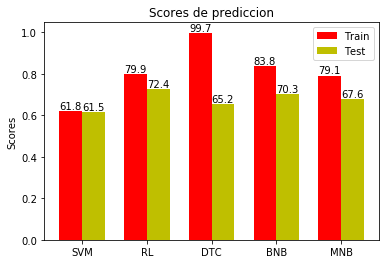

In [14]:
"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 5
train_s = (errorTrainSVC, errorTrainLR, errorTrainDTC, errorTrainBNB, errorTrainMNB)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, train_s, width, color='r')

test_s = (errorTestSVC, errorTestLR, errorTestDTC, errorTestBNB, errorTestMNB)
rects2 = ax.bar(ind + width, test_s, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores de prediccion')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('SVM', 'RL', 'DTC', 'BNB', 'MNB'))

ax.legend((rects1[0], rects2[0]), ('Train', 'Test'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.1f' % float(height*100),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

<p>
Antes de describir las máquinas y su comportamiento de clasificación sobre los conjuntos de entrenamiento y prueba describamos el conjunto de entrada: como ya se dijo anteriormente se construye utilizando las funciones de Tf-idf(Term frequency- Inverse Document frequency). En resumen una fila corresponde a un documento/tweet en especifico, mientras que cada columna es un token (palabra reducida a un objeto que contiene su tronco léxico base), y cada elemento en la matriz es el puntaje tf-idf() asignado, el cual se calcula usando el logaritmo de la razón entre la aparicion de la palabra en el documento y la cantidad de documentos en las que aparece, de forma que define la importancia de un termino en especifico con respecto al texto y la importancia de la palabra para clasificar al texto completo. Un buen ejemplo de esto sería: se tiene un conjunto de textos sobre maestros de las espadas(tanto históricos como ficticios), probablemente la palabra espada aparecerá mucho en cada texto, pero así también muy probablemente esté en una gran cantidad de documentos, sino es que en todos ellos, en cambio la palabra Skywalker será un muy buen descriptor de un texto que hable sobre La Guerra de las Galaxias, porque problamente aparecerá mucho en el documento, pero no se le verá en una gran cantidad de documentos diferentes. Además se puede deducir que un texto por increiblemente largo que sea, probablemente no usara todo el vocabulario, de hecho por Ley de Zipf probablemente utilizara en gran medida solo una pequeña parte de este, en el caso de los tweets donde la cantidad de letras es muy limitada este efecto se acentua aun más, de manera que la matriz de vocabulario/documentos será extremadamente dispersa (tendrá muchos 0). Esta es la razón por la que construir una máquina LDA, QDA o Gaussian Naive Bayes queda descartado, ya que requieren de una matriz densa para funcionar. Por otro lado se descarta también el uso de una máquina de clasificación K-Neighbors, no por límites de aprendizaje, ya que no intenta crear un modelo generalizador, sino que guarda un conjunto de entrenamiento, el límite de esta máquina viene al momento de intentar predecir una clase para un determinado documento, puesto que la clasificación se hace por una mayoría de votos de sus vecinos (puntos cercanos al que se intenta predecir) y procesar estos "votos" para el caso de texto es extremadamente costoso.
</p>
<p>
Las Support Vector Machines o SVM son un tipo de máquinas de aprendizaje muy versátiles, ya que al trabajar con vectores de soporte son eficientes en su uso de memoria, pueden ser entrenadas utilizando distintos tipos de kernel y funcionan bastante bien en espacios altamente dimecionales, siempre y cuando la cantidad de ejemplos de entrenamiento sea mayor a la cantidad de características. La primera máquina que se entrenó fue una SVM especializada en clasificación (SVC), su comportamiento fue de clasificación fue el menor de todas las máquinas entrenadas acertando solo en aproximadamente el 60% de los casos.
</p>
<p>
La Regresión Logística es un modelo muy simple para realizar clasificación, se basa en los modelos lineales generales y en una función logística. De manera básica se construye una regresión sobre los datos de entrenamiento y se define un umbral de probabilidad de pertenencia a la clase positiva. Para este caso si bien, no es la que mejor se comporta en el conjunto de entrenamiento, es la que obtiene el mejor puntaje de clasificación (~73%). Intuimos que la simplicidad del modelo ayudó a evitar el overfitting y favorecio la generalización del modelo.
</p>
<p>
Un árbol de decisión para clasificación (DTC, por sus siglas en inglés), logra relizar clasificación dividiendo el espacio en regiones hiper-rectangulares y clasificando dichas regiones según la clase modal de la misma, es decir, se clasifica todo dato que caiga dentro de la región como si fuera de la clase que se observo con la mayoría en esa zona durante el entrenamiento del árbol. Esto último genera una gran inclinación a Overfitting, y se puede apreciar claramente en los resultado, al ver que en el conjunto de entrenamiento solo se equivoca en el ~0.03% de los casos, pero en el conjunto de prueba es la penúltima máquina acertando solo un ~65%.  
</p>
<p>
Por último estan ambos clasificadores del tipo Naive Bayes, este tipo de máquinas es altamente usado para el análisis de texto, además de ser potentes para la clasificación y como su nombre lo sugieren se basan en el cálculo de probabilidades usando el Teorema de Bayes. La Multinomial NB, en teoría funciona bien para clasificación de texto donde la representación es proporcional a la ocurrencia de palabras en un documento y/o donde los datos se comporten de manera multinomial. Mientras que una Bernnoulli NB, se comporta de manera similar a la MBN, pero con entradas binarias $X_i={0,1}$, lo cual es interesante pues el conjunto de entrenamiento no lo es, lo que nos hace sospechar que la máquina por dentro interpreta todo lo que sea 0, como 0 y lo que no sea 0, lo interpreta como 1. Como es de esperase ambas maquinas tuvieron comportamientos muy similares con puntajes de clasificación de entrenamiento entre ~78% y ~83% mientras que para las pruebas tuvieron puntajes de entre ~68% y ~70% (BNB y MBN, respectivamente).
</p>

<p>(g) Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base
a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?
</p>

In [15]:
from sklearn.metrics import classification_report

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

print("SVM:*******************")
score_the_model(clf, freqID, cod_train, freqIDT, cod_test)
print("RL:*******************")
score_the_model(model, freqID, cod_train, freqIDT, cod_test)
print("DTC:*******************")
score_the_model(arbol, freqID, cod_train, freqIDT, cod_test)
print("BNB:*******************")
score_the_model(BNB, freqID, cod_train, freqIDT, cod_test)
print("MNB:*******************")
score_the_model(Mnaive, freqID, cod_train, freqIDT, cod_test)

SVM:*******************
Training Accuracy: 0.618241
Test Accuracy: 0.614668
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.61      1.00      0.76      4819
          -       0.00      0.00      0.00      3022

avg / total       0.38      0.61      0.47      7841

RL:*******************
Training Accuracy: 0.798657
Test Accuracy: 0.724362
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.74      0.85      0.79      4819
          -       0.69      0.53      0.59      3022

avg / total       0.72      0.72      0.72      7841

DTC:*******************
Training Accuracy: 0.997233
Test Accuracy: 0.652551
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.71      0.73      0.72      4819
          -       0.55      0.52      0.54      3022

avg / total       0.65      0.65      0.65      7841

BNB:**********

C:\Users\Alfredo\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<p>
Antes de poder escoger un ganador primero necesitamos entender que medidas nos entrega la función. Accuracy es trivial, ya hemos hablado de ella con anterioridad, corresponde al puntaje de clasificación es decir: que porcentaje de clasificaciones se hicieron correctamente en razón de la totalidad de clasificaciones realizadas.
</p>
<p>
Presición corresponde a la cantidad de verdaderos positivos dividido entre los verdaderos positivos y los falsos positivos, se suele decir también que corresponde a una medida de relevancia que responde a la pregunta: cuantos elementos escogidos son realmente relevantes, por ejemplo se le entrega a un clasificador que reconoce perros y gatos una imagen donde hay 12 perros y algunos gatos, de 8 perros reconocidos, 5 son realemnte perros y los otros 3 son gatos, entonces la presición del clasificador sería de 5/8. Por otro lado la segunda medida de relevancia es el Recall, que es la cantidad de verdaderos positivos dividida en la cantidad de verdaderos positivos y falsos negativos, en otras palabras se dice que es la medida de cuantos elementos relevantes son seleccionados, en el ejemplo anterior el recall sería de 5/12. La tercera medida de relevancia es una suerte de combinación de las dos anteriores $F_1$ suele generalizarse como la media armónica entre la Presición y el Recall. 
</p>
<p>
Por último el Support corresponde al número de ocurrencias de cada clase.
</p>
<p>Después de saber todo esto por fin podemos decidir cual es la mejor máquina tomando en cuenta todas las métricas. Para nosotros la que mejor se comporta en todas las métricas, para ambas clases y en promedio es la Regresión logística, ganandole incluso a las máquinas Naive Bayes que son generalmente usadas para análisis/clasificación de texto. Como ya se comentó anteriormente, esto puede ser producto de la simplicidad del modelo con comparación con la inmensa cantidad de features y de la reducción binaria de las clases, pero además puede ser producto de que los tweets no son muy largos, por lo que no contienen muchos tokens, si no especulamos que quizas las máquinas NB hubieran superado a la regresión. </p>

<p>
(h) [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente,
tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el
clasificador a cada clase.
</p>

In [ ]:
test_pred = model.predict_proba(X_test)
spl = random.sample(xrange(len(test_pred)), 15)
for text, sentiment in zip(df_test.content[spl], test_pred[spl]):
    print sentiment, text

<p>(i) Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones),
es decir, su trabajo será el de predecir una de las distintas emociones de cada tweet. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas
en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.
</p>

In [16]:
def codificacionMultiple(sentimientos):
    lista=['love', 'relief', 'neutral', 'anger',
            'sadness', 'empty', 'surprise', 'fun', 
            'enthusiasm', 'happiness', 'hate', 'worry', 'boredom']
    cn=[]
    for senti in sentimientos:
        n = lista.index(str(senti)) +1
        cn.append(n)
    return cn

def decodificacionMultiple(sentimientos):
    lista=['love', 'relief', 'neutral', 'anger',
            'sadness', 'empty', 'surprise', 'fun', 
            'enthusiasm', 'happiness', 'hate', 'worry', 'boredom']
    cn = []
    for senti in sentimientos:
        n = senti -1
        cn.append(lista[n])
    return cn
mcod_train = codificacionMultiple(df_train['sentiment'].values)
mcod_test = codificacionMultiple(df_test['sentiment'].values)

In [17]:
import collections
counter=collections.Counter(mcod_train)
print("Frecuencia de datos en Training:")
for i in range(len(counter.values())):
    print("{}. {} = {}".format(counter.keys()[i],
                             decodificacionMultiple([counter.keys()[i]])[0],
                             counter.values()[i]))

print("")
counter=collections.Counter(mcod_test)
print("Frecuencia de datos en Test:")
for i in range(len(counter.values())):
    print("{}.{} = {}".format(counter.keys()[i],
                             decodificacionMultiple([counter.keys()[i]])[0],
                             counter.values()[i]))

Frecuencia de datos en Training:
1. love = 3072
2. relief = 1195
3. neutral = 6930
4. anger = 91
5. sadness = 4122
6. empty = 665
7. surprise = 1752
8. fun = 1459
9. enthusiasm = 623
10. happiness = 4176
11. hate = 1053
12. worry = 6873
13. boredom = 148

Frecuencia de datos en Test:
1.love = 770
2.relief = 331
3.neutral = 1708
4.anger = 19
5.sadness = 1043
6.empty = 162
7.surprise = 435
8.fun = 317
9.enthusiasm = 136
10.happiness = 1033
11.hate = 270
12.worry = 1586
13.boredom = 31


<p>
En comparación con lo anteriormente realizado la cantidad de datos por clases es abismalmente menor, pasando de entre 12000-19000 datos por clase a 86-3100 datos, esperamos que esto tenga fuertes repercusiones en las siguientes máquinas a entrenar, pues los datos no serán suficientes para que las máquinas aprendan a categorizar las clases con menos ejemplos.
</p>

<p>(j) Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en
cada tweet, muestre sus desempeños a través del error de pruebas en un gráfico resumen.</p>

Score de LR(test): 0.343451090422
Score de DTC(test): 0.260425966076
Score de BNB(test): 0.29269225864


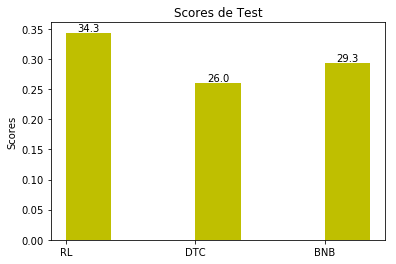

In [18]:
#Inherentemente multicalses
#sklearn.naive_bayes.BernoulliNB
#sklearn.tree.DecisionTreeClassifier
#sklearn.linear_model.LogisticRegression (setting multi_class=”multinomial”)
from sklearn.metrics import accuracy_score

#Regresión Logistica***********************************************
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='newton-cg')
model.fit(freqID,mcod_train)
predTestLR = model.predict(freqIDT)
errorTestLR = accuracy_score(predTestLR,mcod_test)
print("Score de LR(test): "+str(errorTestLR))

#DTC****************************************************************
from sklearn.tree import DecisionTreeClassifier as DTC
arbol = DTC()
arbol.fit(freqID,mcod_train)
predTestDTC = arbol.predict(freqIDT)
errorTestDTC = accuracy_score(predTestDTC,mcod_test)
print("Score de DTC(test): "+str(errorTestDTC))

#BNB****************************************************************
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(freqID, mcod_train)
predTestBNB = BNB.predict(freqIDT)
errorTestBNB = accuracy_score(predTestBNB,mcod_test)
print("Score de BNB(test): "+str(errorTestBNB))


"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 3
#train_s = (errorTrainSVC, errorTrainLR, errorTrainDTC, errorTrainBNB, errorTrainMNB)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, train_s, width, color='r')

test_s = (errorTestLR, errorTestDTC, errorTestBNB)
rects2 = ax.bar(ind + width, test_s, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores de Test')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('RL', 'DTC', 'BNB'))



def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.1f' % float(height*100),
                ha='center', va='bottom')

#autolabel(rects1)
autolabel(rects2)

plt.show()

<p>
Como se esperaba el puntaje de clasificación (Accuracy) de todas las máquinas no alcanzó a ser ni siquiera la mitad de lo que era anteriormente, esto pues el número de ejemplos por clase es mucho menor a la cantidad de features que se tienen para clasificar, por lo que las máquinas no pueden generalizar. Aun así la tendencia de comportamiento se mantuvo, la regresión lineal fue la que mejor se comportó, luego la BNB y por útlimo el árbol.
</p>

<p>(k) Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs
One y One vs All/Rest.
</p>

Score de LR-One Vs Rest(test): 0.344343833695
Score de SVC-One Vs One(test): 0.284785103941


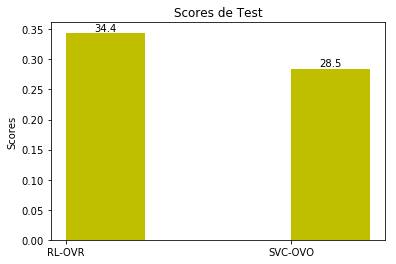

In [19]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn import svm
from sklearn.linear_model import LogisticRegression
#sklearn.svm.SVC ONE-VS-ONE
#sklearn.linear_model.LogisticRegression (setting multi_class=”ovr”) ONE-VS-ALL
modelLR = LogisticRegression(multi_class='ovr')
modelLR.fit(freqID, mcod_train)
predTestLR = modelLR.predict(freqIDT)
errorTestLR = accuracy_score(predTestLR,mcod_test)
print("Score de LR-One Vs Rest(test): "+str(errorTestLR))

modelSVC = svm.SVC()
classif = OneVsRestClassifier(modelSVC)
classif.fit(freqID, mcod_train)
predTestSVC_OVO = classif.predict(freqIDT)
errorTestSVC_OVO = accuracy_score(predTestSVC_OVO,mcod_test)
print("Score de SVC-One Vs One(test): "+str(errorTestSVC_OVO))


"""
========
Barchart
========

A bar plot with errorbars and height labels on individual bars
"""
import numpy as np
import matplotlib.pyplot as plt

N = 2
#train_s = (errorTrainSVC, errorTrainLR, errorTrainDTC, errorTrainBNB, errorTrainMNB)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(ind, train_s, width, color='r')

test_s = (errorTestLR, errorTestSVC_OVO)
rects2 = ax.bar(ind + width, test_s, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores de Test')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('RL-OVR', 'SVC-OVO',))



def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.1f' % float(height*100),
                ha='center', va='bottom')

#autolabel(rects1)
autolabel(rects2)

plt.show()


<p>
Antes de comentar su desempeño primero debemos definir que es una máquina One-Vs-Rest(OVR) y One-Vs-One(OVO). Ambas son maneras de extender máquinas de clasificación binarias a máquinas de clasificación multiclases. En OVR se entrena una máquina por clase, se le entregan ejemplos positivos de pertenencia a la clase y todo el resto de los elementos son ejemplos negativos de pertenencia a la clase, por lo que en teoría una máquinaarrojará un resultado positivo y el resto resultados negativos para predecir la pertenencia de un elemento. Por otro lado OVO entrena $\frac{K(K-1)}{2}$ máquinas y a cada una le entrega ejemplos positivos de pertenencia de dos clases diferentes, de manera que se aprende a diferenciar entre dos clases en especifico por cada máquina y se usa ese aprendizaje colectivo para determinar la pertenencia de un elemento a una de las multiples clases. 
</p>
<p>
Claramente la regresión logística tiene mejor comportamiento que la SVC, pero este comportamiento también se habia observado con anterioridad en los casos binarios, por lo que probablemente se mantengan las mismas razones de su superioridad.
</p>

<p>(l) Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases.
Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.</p>

In [20]:
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), 
                                target_names=['love', 'relief', 'neutral', 
                                              'anger', 'sadness', 'empty', 
                                              'surprise', 'fun', 'enthusiasm', 
                                              'happiness', 'hate', 'worry', 'boredom']))

print("LR:*******************")
score_the_model(model, freqID, mcod_train, freqIDT, mcod_test)

print("LR-OVR:*******************")
score_the_model(modelLR, freqID, mcod_train, freqIDT, mcod_test)

LR:*******************
Training Accuracy: 0.547872
Test Accuracy: 0.343495
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

       love       0.49      0.39      0.43       770
     relief       0.38      0.04      0.08       331
    neutral       0.34      0.53      0.41      1708
      anger       0.00      0.00      0.00        19
    sadness       0.36      0.24      0.29      1043
      empty       0.00      0.00      0.00       162
   surprise       0.22      0.03      0.05       435
        fun       0.04      0.01      0.01       317
 enthusiasm       0.00      0.00      0.00       136
  happiness       0.33      0.37      0.35      1033
       hate       0.46      0.14      0.21       270
      worry       0.32      0.51      0.39      1586
    boredom       0.00      0.00      0.00        31

avg / total       0.32      0.34      0.31      7841

LR-OVR:*******************
Training Accuracy: 0.519264
Test Accuracy: 0.344388
Detailed A

<p>
Tanto la regresión logistica multiclases extendida tanto por parametro como por OVR se comportan realmente parecidas y no exite una clara diferenciación entre ellas, es notable que las clases con menos ejemplos de los cuales aprender no recibieron elementos asignados a ellas en el conjunto de pruebas, quedando aun más claro lo que se proponia desde un principio.
</p>

<p>(m) Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos
mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se
comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?
</p>

In [21]:
print("SVC-OVO:*******************")
score_the_model(classif, freqID, mcod_train, freqIDT, mcod_test)

print("DTC:*******************")
score_the_model(arbol, freqID, mcod_train, freqIDT, mcod_test)

print("BNB:*******************")
score_the_model(BNB, freqID, mcod_train, freqIDT, mcod_test)


SVC-OVO:*******************
Training Accuracy: 0.606144
Test Accuracy: 0.284821
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

       love       0.23      0.60      0.33       770
     relief       0.11      0.04      0.06       331
    neutral       0.32      0.45      0.38      1708
      anger       0.00      0.00      0.00        19
    sadness       0.32      0.23      0.27      1043
      empty       0.00      0.00      0.00       162
   surprise       0.08      0.04      0.05       435
        fun       0.00      0.00      0.00       317
 enthusiasm       0.00      0.00      0.00       136
  happiness       0.30      0.14      0.19      1033
       hate       0.24      0.19      0.21       270
      worry       0.35      0.34      0.34      1586
    boredom       0.00      0.00      0.00        31

avg / total       0.26      0.28      0.26      7841

DTC:*******************
Training Accuracy: 0.993408
Test Accuracy: 0.260459
Detailed

<p>
Una vez más la regresión logistica en sus dos versiones sobrepaso al resto de las máquinas en todas las métricas y las tendencias vistas en sus versiones binarias se mantuvieron también en las multiclases. Además al igual que en item anterior, no hubo máquina alguna que lograra clasificar algun elemento de prueba en las clases con menos ejemplos en el conjunto de entrenamiento.
</p>